In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import surprise
from surprise.prediction_algorithms.knns import KNNBaseline
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection.search import GridSearchCV
from surprise import Dataset
from surprise import Reader
%matplotlib inline

In [6]:
reader = Reader(line_format='user item rating', sep=',', skip_lines=3, rating_scale=(1, 5))

In [7]:
df=pd.read_csv('./ml-latest-small/ratings.csv')
df=df.drop(['timestamp'],axis=1)
data=Dataset.load_from_df(df,reader=reader)

In [8]:
origin_size=len(df.values)
gap=int(origin_size/5)
new_size=np.arange(gap,origin_size,gap)

In [9]:
neighbor_size=np.arange(5,100,10)

## Knn

In [40]:
Knn_time = []
Knn_train_MAE=[]
Knn_test_MAE=[]
Knn_train_RMSE=[]
Knn_test_RMSE=[]

for k in neighbor_size:    
    algo=KNNBaseline(k=k)
    c_v=cross_validate(algo, data,cv=10, verbose=True,return_train_measures =True)
    Knn_time.append(np.mean(c_v['fit_time']))
    Knn_train_MAE.append(np.mean(c_v['train_mae']))
    Knn_test_MAE.append(np.mean(c_v['test_mae']))
    Knn_train_RMSE.append(np.mean(c_v['train_rmse']))
    Knn_test_RMSE.append(np.mean(c_v['test_rmse']))
knn_result=[Knn_time,Knn_train_MAE,Knn_test_MAE,Knn_train_RMSE,Knn_test_RMSE]  

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8775  0.8571  0.8779  0.8625  0.8772  0.8726  0.8739  0.8629  0.8664  0.8735  0.8701  0.0070  
MAE (testset)     0.6713  0.6568  0.6709  0.6633  0.6658  0.6635  0.6645  0.6596  0.6624  0.6705  0.6648  0.0046  
RMSE (trainset)   0.6814  0.6836  0.6818  0.6826  0.6819  0.6824  0.6824  0.6829  0.6834  0.6825  0.6825  0.0007  
MAE (trainset)    0.5071  0.5085  0.5074  0.5077  0.5075  0.5

Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity

In [41]:
#store result to prevent from running it again
%store knn_result

Stored 'knn_result' (list)


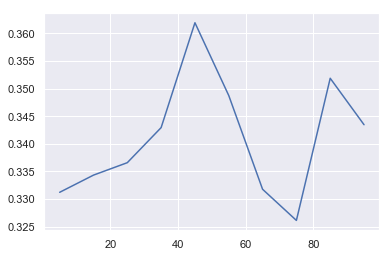

In [42]:
#knn-time
sns.lineplot(neighbor_size, Knn_time, palette="tab10")

In [43]:
#选择困难：不知道是画两个还是画一个图，所以就先都画了一遍
Knn_MAE = pd.DataFrame(np.column_stack([Knn_test_MAE, Knn_train_MAE]),columns=['Knn_test_MAE', 'Knn_train_MAE'])
Knn_MAE.index = neighbor_size
Knn_RMSE = pd.DataFrame(np.column_stack([Knn_test_RMSE, Knn_train_RMSE]),columns=['Knn_test_RMSE', 'Knn_train_RMSE'])
Knn_RMSE.index = neighbor_size

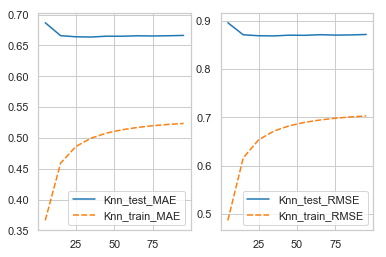

In [46]:
fig, axs = plt.subplots(ncols=2)
sns.lineplot(data = Knn_MAE, palette="tab10",ax = axs[0])
sns.lineplot(data = Knn_RMSE, palette="tab10",ax = axs[1])

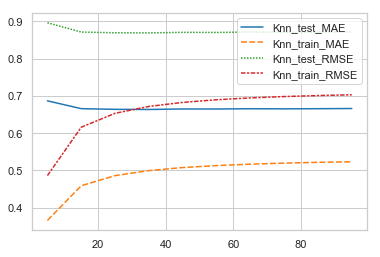

In [45]:
Knn = pd.DataFrame(np.column_stack([Knn_test_MAE, Knn_train_MAE,Knn_test_RMSE, Knn_train_RMSE]),
                   columns=['Knn_test_MAE', 'Knn_train_MAE','Knn_test_RMSE', 'Knn_train_RMSE'])
Knn.index = neighbor_size
sns.lineplot(data = Knn, palette="tab10")

### Knn - size

In [30]:
param_grid = {'k': neighbor_size}
knn_gs=GridSearchCV(KNNBaseline,param_grid)
knn_gs.fit(data)

bestk = knn_gs.best_params['mae']['k']

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [31]:
knn_size_effect=[]
Knn_time = []
Knn_train_MAE=[]
Knn_test_MAE=[]
Knn_train_RMSE=[]
Knn_test_RMSE=[]
for n in new_size:
    new_df=df.sample(n=n)
    data=Dataset.load_from_df(new_df,reader=reader)
    algo=KNNBaseline(k=bestk)
    c_v=cross_validate(algo, data,cv=10, verbose=True,return_train_measures =True)
    Knn_time.append(np.mean(c_v['fit_time']))
    Knn_train_MAE.append(np.mean(c_v['train_mae']))
    Knn_test_MAE.append(np.mean(c_v['test_mae']))
    Knn_train_RMSE.append(np.mean(c_v['train_rmse']))
    Knn_test_RMSE.append(np.mean(c_v['test_rmse']))
knn_size_effect=[Knn_time,Knn_train_MAE,Knn_test_MAE,Knn_train_RMSE,Knn_test_RMSE]  


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8730  0.8770  0.8644  0.8660  0.8737  0.8675  0.8635  0.8653  0.8717  0.8651  0.8687  0.0045  
MAE (testset)     0.6693  0.6698  0.6605  0.6658  0.6663  0.6634  0.6557  0.6607  0.6638  0.6614  0.6637  0.0041  
RMSE (trainset)   0.6708  0.6713  0.6716  0.6715  0.6711  0.6713  0.6716  0.6724  0.6719  0.6719  0.6715  0.0004  
MAE (trainset)    0.4991  0.4994  0.4996  0.4996  0.4991  0.4

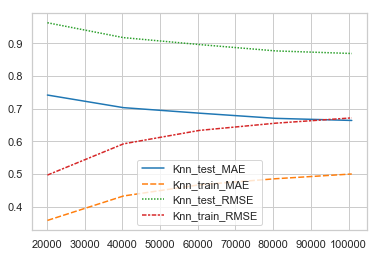

In [35]:
Knn_newsize = pd.DataFrame(np.column_stack([Knn_test_MAE, Knn_train_MAE,Knn_test_RMSE, Knn_train_RMSE]),
                   columns=['Knn_test_MAE', 'Knn_train_MAE','Knn_test_RMSE', 'Knn_train_RMSE'])
Knn_newsize.index = new_size
sns.lineplot(data = Knn_newsize, palette="tab10")

## SVD

In [10]:
learning_rate=np.arange(0.001,0.01,0.002)
regularization=np.arange(0.01,0.1,0.02)
n_factors=np.arange(50,200,50)
n_epochs=np.arange(10,100,20)

svd_result=[]
for lr in learning_rate:
    SVD_time = []
    SVD_train_MAE=[]
    SVD_test_MAE=[]
    SVD_train_RMSE=[]
    SVD_test_RMSE=[]
    
    for reg in regularization:
        algo=SVD(n_epochs =50,lr_all=lr,r eg_all=reg)
        c_v=cross_validate(algo, data,cv=10, verbose=True,return_train_measures =True)
        SVD_time.append(np.mean(c_v['fit_time']))
        SVD_train_MAE.append(np.mean(c_v['train_mae']))
        SVD_test_MAE.append(np.mean(c_v['test_mae']))
        SVD_train_RMSE.append(np.mean(c_v['train_rmse']))
        SVD_test_RMSE.append(np.mean(c_v['test_rmse']))
    svd_result.append([SVD_time,SVD_train_MAE,SVD_test_MAE,SVD_train_RMSE,SVD_test_RMSE])


Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8895  0.8820  0.8800  0.8784  0.8864  0.8734  0.8834  0.8748  0.8752  0.8701  0.8793  0.0058  
MAE (testset)     0.6844  0.6793  0.6780  0.6812  0.6758  0.6762  0.6760  0.6741  0.6742  0.6696  0.6769  0.0039  
RMSE (trainset)   0.7621  0.7620  0.7614  0.7602  0.7597  0.7598  0.7608  0.7629  0.7633  0.7620  0.7614  0.0012  
MAE (trainset)    0.5881  0.5884  0.5874  0.5862  0.5872  0.5868  0.5875  0.5891  0.5891  0.5889  0.5879  0.0010  
Fit time          14.88   15.07   14.75   15.26   15.33   15.17   15.82   15.86   15.31   15.49   15.29   0.34    
Test time         0.12    0.06    0.06    0.06    0.06    0.11    0.06    0.07    0.06    0.07    0.07    0.02    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fol

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9012  0.8987  0.8913  0.8942  0.8939  0.9080  0.8913  0.8989  0.8931  0.9023  0.8973  0.0052  
MAE (testset)     0.6928  0.6916  0.6867  0.6840  0.6877  0.6970  0.6875  0.6928  0.6843  0.6883  0.6893  0.0039  
RMSE (trainset)   0.2549  0.2567  0.2576  0.2570  0.2568  0.2577  0.2572  0.2570  0.2564  0.2573  0.2569  0.0007  
MAE (trainset)    0.1934  0.1948  0.1955  0.1952  0.1952  0.1961  0.1953  0.1954  0.1949  0.1953  0.1951  0.0007  
Fit time          14.91   14.66   14.66   14.38   14.55   14.56   14.64   14.62   14.55   14.39   14.59   0.14    
Test time         0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.05    0.06    0.00    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fol

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9026  0.9028  0.8959  0.8986  0.9033  0.9003  0.8906  0.8971  0.9003  0.9059  0.8997  0.0042  
MAE (testset)     0.6921  0.6942  0.6922  0.6887  0.6954  0.6909  0.6840  0.6890  0.6919  0.6996  0.6918  0.0040  
RMSE (trainset)   0.1496  0.1481  0.1477  0.1479  0.1480  0.1484  0.1475  0.1488  0.1487  0.1484  0.1483  0.0006  
MAE (trainset)    0.1097  0.1084  0.1082  0.1082  0.1084  0.1084  0.1078  0.1088  0.1088  0.1087  0.1085  0.0005  
Fit time          14.75   15.10   15.83   14.67   14.61   14.87   14.83   14.86   14.92   14.62   14.91   0.34    
Test time         0.05    0.06    0.06    0.06    0.06    0.06    0.06    0.06    0.11    0.06    0.06    0.02    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fol

In [11]:
%store svd_result

Stored 'svd_result' (list)


In [110]:
learning_rate

array([0.001, 0.003, 0.005, 0.007, 0.009])

In [111]:
regularization

array([0.01, 0.03, 0.05, 0.07, 0.09])

In [12]:
svd_result

[[[15.293750190734864,
   14.94609625339508,
   14.946623635292053,
   14.976887035369874,
   14.889759254455566],
  [0.5878614863561233,
   0.606283734843424,
   0.6174699439785853,
   0.6252736268212058,
   0.6308323111069642],
  [0.6768896006221607,
   0.6751037754826635,
   0.6752811370158377,
   0.6750017440552366,
   0.6756663356229016],
  [0.7614167909815415,
   0.7849014210413776,
   0.7994625893790019,
   0.8094448863568615,
   0.816580190690957],
  [0.8793295542076776,
   0.8764455277370816,
   0.8765410887708927,
   0.876090822781871,
   0.8763894673389556]],
 [[14.83118748664856,
   15.415873265266418,
   15.11498761177063,
   14.540412735939025,
   14.364144492149354],
  [0.3281862596663627,
   0.4250137473129982,
   0.4938101659966515,
   0.5394943473554509,
   0.5709045294991356],
  [0.6788651514395333,
   0.6612879908149056,
   0.6577744226058407,
   0.6585936401964241,
   0.661093546395092],
  [0.4266278234119424,
   0.544297532401491,
   0.6329143638043581,
   0.69343

In [30]:
svd_time = []
svd_train_MAE = []
svd_test_MAE = []
svd_train_RMSE = []
svd_test_RMSE = []
for row in svd_result:
    svd_time.append(row[0])
    svd_train_MAE.append(row[1])
    svd_test_MAE.append(row[2])
    svd_train_RMSE.append(row[3])
    svd_test_RMSE.append(row[4])

In [31]:
svd_time = pd.DataFrame(svd_time)
svd_time.index = learning_rate.round(3)
svd_time.index.name = 'learning_rate'
svd_time.columns = regularization.round(2)
svd_time.columns.name = 'regularization'

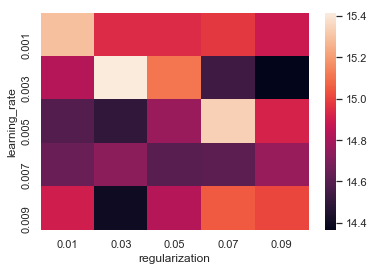

In [33]:
#svd-time
sns.heatmap(data = svd_time)

In [34]:
svd_test_MAE = pd.DataFrame(svd_test_MAE)
svd_test_MAE.index = learning_rate.round(3)
svd_test_MAE.index.name = 'learning_rate'
svd_test_MAE.columns = regularization.round(2)
svd_test_MAE.columns.name = 'regularization'

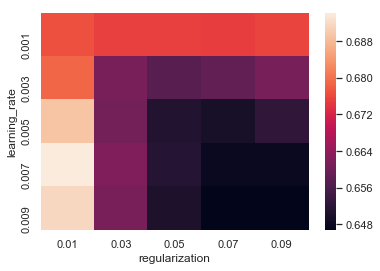

In [36]:
#svd-MAE
sns.heatmap(data = svd_test_MAE)

In [37]:
svd_test_RMSE = pd.DataFrame(svd_test_RMSE)
svd_test_RMSE.index = learning_rate.round(3)
svd_test_RMSE.index.name = 'learning_rate'
svd_test_RMSE.columns = regularization.round(2)
svd_test_RMSE.columns.name = 'regularization'

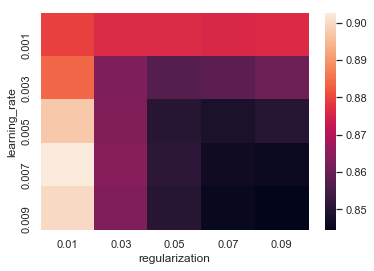

In [38]:
#svd-RMSE
sns.heatmap(data = svd_test_RMSE)

### SVD - size

In [339]:
param_grid = {'lr_all': learning_rate,'reg_all':regularization}
svd_gs=GridSearchCV(SVD,param_grid)
svd_gs.fit(data)

bestlr = svd_gs.best_params['mae']['lr_all']
bestreg=svd_gs.best_params['mae']['reg_all']

In [106]:
SVD_time = []
SVD_train_MAE=[]
SVD_test_MAE=[]
SVD_train_RMSE=[]
SVD_test_RMSE=[]
SVD_size_effect=[]
for n in new_size:
    new_df=df.sample(n=n)
    data=Dataset.load_from_df(new_df,reader=reader)
    algo=SVD(n_epochs =50,lr_all=bestlr,reg_all=bestreg)
    c_v=cross_validate(algo, data,cv=10, verbose=True,return_train_measures =True)
    SVD_time.append(np.mean(c_v['fit_time']))
    SVD_train_MAE.append(np.mean(c_v['train_mae']))
    SVD_test_MAE.append(np.mean(c_v['test_mae']))
    SVD_train_RMSE.append(np.mean(c_v['train_rmse']))
    SVD_test_RMSE.append(np.mean(c_v['test_rmse']))
SVD_size_effect.append([SVD_time,SVD_train_MAE,SVD_test_MAE,SVD_train_RMSE,SVD_test_RMSE])

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9233  0.9496  0.9296  0.9280  0.9413  0.9477  0.9141  0.9087  0.9402  0.9336  0.9316  0.0129  
MAE (testset)     0.7108  0.7484  0.7219  0.7287  0.7293  0.7407  0.7115  0.7133  0.7393  0.7194  0.7263  0.0126  
RMSE (trainset)   0.7896  0.7887  0.7895  0.7891  0.7869  0.7898  0.7892  0.7926  0.7870  0.7881  0.7890  0.0015  
MAE (trainset)    0.6161  0.6148  0.6144  0.6145  0.6134  0.6151  0.6141  0.6172  0.6118  0.6139  0.6145  0.0014  
Fit time          2.90    3.07    2.86    2.83    2.80    2.96    3.04    2.78    2.88    2.82    2.89    0.10    
Test time         0.01    0.01    0.01    0.01    0.01    0.02    0.01    0.01    0.01    0.01    0.01    0.00    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fol

In [342]:
%store SVD_size_effect

Stored 'SVD_size_effect' (list)


In [340]:
bestlr

0.009000000000000001

In [341]:
bestreg

0.06999999999999999

In [336]:
SVD_size_effect

[[[2.8942103385925293,
   5.720335292816162,
   9.041515731811524,
   12.01565899848938,
   13.82228126525879],
  [0.6145251473915534,
   0.6010886472278548,
   0.5957145171888809,
   0.5910665915009248,
   0.5880322658274679],
  [0.7263185635090597,
   0.7013455615888908,
   0.6912625895740026,
   0.6825705336833628,
   0.6774695958294334],
  [0.789039934618068,
   0.7770248687744223,
   0.7696728399406192,
   0.7647064822067816,
   0.7614175934140806],
  [0.9316125008788628,
   0.9072755686603354,
   0.8938868109558019,
   0.8854374909609424,
   0.8795866931205916]]]

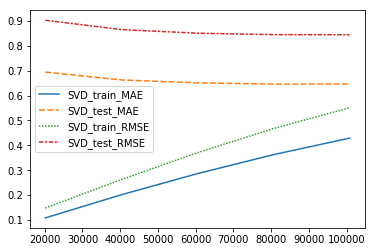

In [338]:
svd_newsize = pd.DataFrame(np.column_stack([SVD_train_MAE, SVD_test_MAE,SVD_train_RMSE, SVD_test_RMSE]),
                   columns=['SVD_train_MAE', 'SVD_test_MAE','SVD_train_RMSE', 'SVD_test_RMSE'])
svd_newsize.index = new_size
sns.lineplot(data = svd_newsize, palette="tab10")